In [97]:
## Library
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords
from tqdm import tqdm
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [98]:
# Model 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

# Model Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

In [99]:
# Importing ignoring system warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [100]:
## Loading the Pet Adoption file 

df = pd.read_csv('C:/Users/jlpar/Documents/Springboard Curriculum/Projects/Capsone Project Ideas/Capstone Data/Pet Adoption/train.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [101]:
## Checking the Dataframe
df.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3


In [102]:
## Dropping the missing values for the Text
df2 = df
df2 = df.dropna()
df2.shape

(13724, 24)

In [103]:
## Checking to see if all missing values were dropped
df2.dropna(subset=['Name'], inplace=True)
df2.count()

Type             13724
Name             13724
Age              13724
Breed1           13724
Breed2           13724
Gender           13724
Color1           13724
Color2           13724
Color3           13724
MaturitySize     13724
FurLength        13724
Vaccinated       13724
Dewormed         13724
Sterilized       13724
Health           13724
Quantity         13724
Fee              13724
State            13724
RescuerID        13724
VideoAmt         13724
Description      13724
PetID            13724
PhotoAmt         13724
AdoptionSpeed    13724
dtype: int64

In [104]:
# Creating another column for the new binned AdoptionSeed variable
df2["AdoptionSpeed_t"]=df2["AdoptionSpeed"]
df2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,AdoptionSpeed_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,2


In [105]:
## Binnng the AdoptionSpeed Category into a binary data set
df2.AdoptionSpeed_t[df2.AdoptionSpeed == 0] = 0
df2.AdoptionSpeed_t[df2.AdoptionSpeed == 1] = 0
df2.AdoptionSpeed_t[df2.AdoptionSpeed == 2] = 0
df2.AdoptionSpeed_t[df2.AdoptionSpeed == 3] = 0
df2.AdoptionSpeed_t[df2.AdoptionSpeed == 4] = 1

df2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,AdoptionSpeed_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0


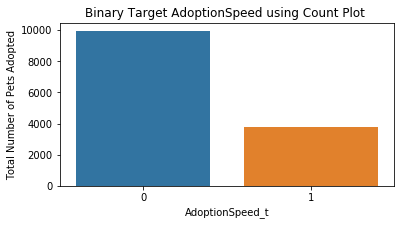

In [106]:
# Printing the Bar and Count Plot for the new Binned AdoptionSPeed_t variable. 
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('AdoptionSpeed_t', data=df2)
ax.set_title('Binary Target AdoptionSpeed using Count Plot ')
ax.set_xlabel('AdoptionSpeed_t')
ax.set_ylabel('Total Number of Pets Adopted')

plt.show()

In [107]:
## Filtering only the PetID, Name and two AdoptionSpeeds
df2 = df2[['PetID', 'Name', 'AdoptionSpeed_t', "AdoptionSpeed"]]
df2.head(3)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed
0,86e1089a3,Nibble,0,2
1,6296e909a,No Name Yet,0,0
2,3422e4906,Brisco,0,3


In [108]:
## Calculating the Text Length for the Names
df2['text_length'] = df2['Name'].apply(len)
df2.head(3)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length
0,86e1089a3,Nibble,0,2,6
1,6296e909a,No Name Yet,0,0,11
2,3422e4906,Brisco,0,3,6


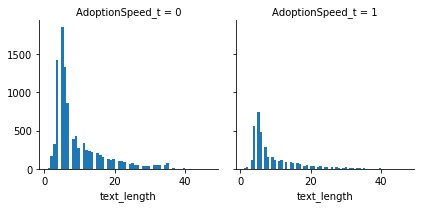

In [109]:
## Printing the Text Length results
g = sns.FacetGrid(data=df2, col='AdoptionSpeed_t')
g.map(plt.hist, 'text_length', bins=60)
plt.show()

In [110]:
# Cross Tabulation for text_length vs. AdoptionSpeed_t 
pd.crosstab(df2.AdoptionSpeed_t, df2['text_length'], margins=True)

text_length,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,42,44,45,47,All
AdoptionSpeed_t,,,,,,,,,,,,,,,,,,,,,
0,15,168,328,1417,1842,1333,856,393,432,277,...,3,13,2,4,6,1,1,2,1,9963
1,10,22,122,556,743,484,289,149,156,115,...,3,3,4,5,10,0,0,0,0,3761
All,25,190,450,1973,2585,1817,1145,542,588,392,...,6,16,6,9,16,1,1,2,1,13724


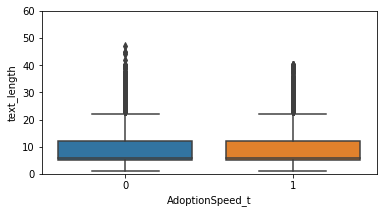

In [111]:
## Box and whisker plot for text_length vs. AdoptionSpeed_t
count, ax = plt.subplots(figsize=(6,3))
fig = sns.boxplot(x='AdoptionSpeed_t', y="text_length", data=df2)
fig.axis(ymin=0, ymax=60);

In [112]:
## Calculating the word count for Name
df2['word_count'] = df['Name'].apply(lambda x: len(str(x).split()))
df2.head(3)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count
0,86e1089a3,Nibble,0,2,6,1
1,6296e909a,No Name Yet,0,0,11,3
2,3422e4906,Brisco,0,3,6,1


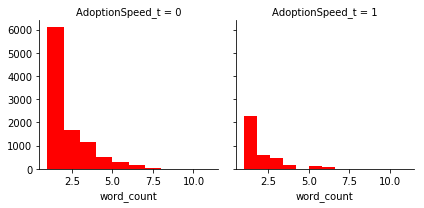

In [113]:
## Graphing word count distribution for Name
g = sns.FacetGrid(data=df2, col='AdoptionSpeed_t')
g.map(plt.hist, 'word_count', bins=10, color='red')
plt.show()

In [114]:
# Cross Tabulation for word_count vs. AdoptionSpeed_t
pd.crosstab(df2.AdoptionSpeed_t, df2['word_count'], margins=True)

word_count,1,2,3,4,5,6,7,8,9,10,11,All
AdoptionSpeed_t,,,,,,,,,,,,
0,6088,1672,1156,491,306,177,55,14,2,1,1,9963
1,2287,598,474,186,127,69,14,5,1,0,0,3761
All,8375,2270,1630,677,433,246,69,19,3,1,1,13724


In [115]:
# Creating another column for the new binned text_length attribute
df2["text_length_t"]=df2["text_length"]
df2.head(1)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t
0,86e1089a3,Nibble,0,2,6,1,6


In [116]:
## Binnng the text_length into a total of 6 binned datasets based on text_ength
df2.text_length_t[df2.text_length == 0] = "zero"
df2.text_length_t[df2.text_length == 1] = "zero"
df2.text_length_t[df2.text_length == 2] = "zero"
df2.text_length_t[df2.text_length == 3] = "zero"
df2.text_length_t[df2.text_length == 4] = "four"
df2.text_length_t[df2.text_length == 5] = "five"
df2.text_length_t[df2.text_length == 6] = "six"
df2.text_length_t[df2.text_length == 7] = "seven"
df2.text_length_t[df2.text_length > 7] = "eight"

df2.head(5)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t
0,86e1089a3,Nibble,0,2,6,1,six
1,6296e909a,No Name Yet,0,0,11,3,eight
2,3422e4906,Brisco,0,3,6,1,six
3,5842f1ff5,Miko,0,2,4,1,four
4,850a43f90,Hunter,0,2,6,1,six


In [117]:
## Converting names to lower case words
df2['Name'] = df2['Name'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2.head(3)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t
0,86e1089a3,nibble,0,2,6,1,six
1,6296e909a,no name yet,0,0,11,3,eight
2,3422e4906,brisco,0,3,6,1,six


In [118]:
# This list of English stop words is taken from the "Glasgow Information
# Retrieval Group". The original list can be found at
# http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words

ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves", '', "kitten", "puppy", "adoption", "2", "3", "baby", "cat", "black", "girl",
    "boy", "cute", "white", "female", "4", "1", "lucky", "brownie", "lucy", 'nibble', "brisco", "miko", "baby"
])

In [119]:
## Converting names to lower case words
df2['Name'] = df2['Name'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2.head(3)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t
0,86e1089a3,nibble,0,2,6,1,six
1,6296e909a,no name yet,0,0,11,3,eight
2,3422e4906,brisco,0,3,6,1,six


In [120]:
## Calculating the stop words removed from each row.
stop = ENGLISH_STOP_WORDS

df2['stopwords'] = df2['Name'].apply(lambda x: len([x for x in x.split() if x in stop]))
df2.head(5)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords
0,86e1089a3,nibble,0,2,6,1,six,1
1,6296e909a,no name yet,0,0,11,3,eight,3
2,3422e4906,brisco,0,3,6,1,six,1
3,5842f1ff5,miko,0,2,4,1,four,1
4,850a43f90,hunter,0,2,6,1,six,0


In [121]:
## Converting names to lower case words
df2['Name'] = df2['Name'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2.head(3)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords
0,86e1089a3,nibble,0,2,6,1,six,1
1,6296e909a,no name yet,0,0,11,3,eight,3
2,3422e4906,brisco,0,3,6,1,six,1


In [122]:
## Removing Punctuation
df2['Name'] = df2['Name'].str.replace('[^\w\s]','')
df2.head(3)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords
0,86e1089a3,nibble,0,2,6,1,six,1
1,6296e909a,no name yet,0,0,11,3,eight,3
2,3422e4906,brisco,0,3,6,1,six,1


In [123]:
## Calculating the most 35 frequent words 
freq = pd.Series(' '.join(df2['Name']).split()).value_counts()[:35]
freq

and         436
kittens     318
puppies     298
kitten      274
for         259
adoption    214
puppy       206
boy         193
2           184
girl        177
baby        163
the         156
cute        143
3           143
black       141
little      133
name        124
no          122
kitty       122
white       122
female      107
lucky       100
1            98
4            96
brownie      93
mix          93
cat          86
home         85
mimi         82
blackie      80
5            75
old          75
pups         73
tiger        72
a            70
dtype: int64

In [124]:
## Removing the top 35 most Frequent words
freq = list(freq.index)
df2['Name'] = df2['Name'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df2['Name'].head()

0    nibble
1       yet
2    brisco
3      miko
4    hunter
Name: Name, dtype: object

In [125]:
## Calculating the top ten least Frequent words
freq = pd.Series(' '.join(df2['Name']).split()).value_counts()[-10:]
freq

zhong        1
âªmamis      1
jacinto      1
cuddle       1
d15041116    1
shimmer      1
2nd          1
dearkitty    1
galgal       1
mailo        1
dtype: int64

In [126]:
## Removing the least 10 most frequent words
freq = list(freq.index)
df2['Name'] = df2['Name'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df2['Name'].head()

0    nibble
1       yet
2    brisco
3      miko
4    hunter
Name: Name, dtype: object

In [127]:
from textblob import Word
df2['Name'] = df2['Name'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df2.head()

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords
0,86e1089a3,nibble,0,2,6,1,six,1
1,6296e909a,yet,0,0,11,3,eight,3
2,3422e4906,brisco,0,3,6,1,six,1
3,5842f1ff5,miko,0,2,4,1,four,1
4,850a43f90,hunter,0,2,6,1,six,0


In [128]:
## replacing the emptyspace with nan
df2.replace('', np.nan, inplace=True)
df2.head()

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords
0,86e1089a3,nibble,0,2,6,1,six,1
1,6296e909a,yet,0,0,11,3,eight,3
2,3422e4906,brisco,0,3,6,1,six,1
3,5842f1ff5,miko,0,2,4,1,four,1
4,850a43f90,hunter,0,2,6,1,six,0


In [129]:
## Removing NAN from the dataset
df2 = df2[pd.notnull(df2['Name'])]
df2.head()

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords
0,86e1089a3,nibble,0,2,6,1,six,1
1,6296e909a,yet,0,0,11,3,eight,3
2,3422e4906,brisco,0,3,6,1,six,1
3,5842f1ff5,miko,0,2,4,1,four,1
4,850a43f90,hunter,0,2,6,1,six,0


In [130]:
########################################################################################

In [131]:
## Calculating the Polarity score for the Name
df2['polarity'] = df2['Name'].map(lambda text: TextBlob(text).sentiment.polarity)
df2.head(3)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords,polarity
0,86e1089a3,nibble,0,2,6,1,six,1,0.0
1,6296e909a,yet,0,0,11,3,eight,3,0.0
2,3422e4906,brisco,0,3,6,1,six,1,0.0


(0.0, 11980.0)

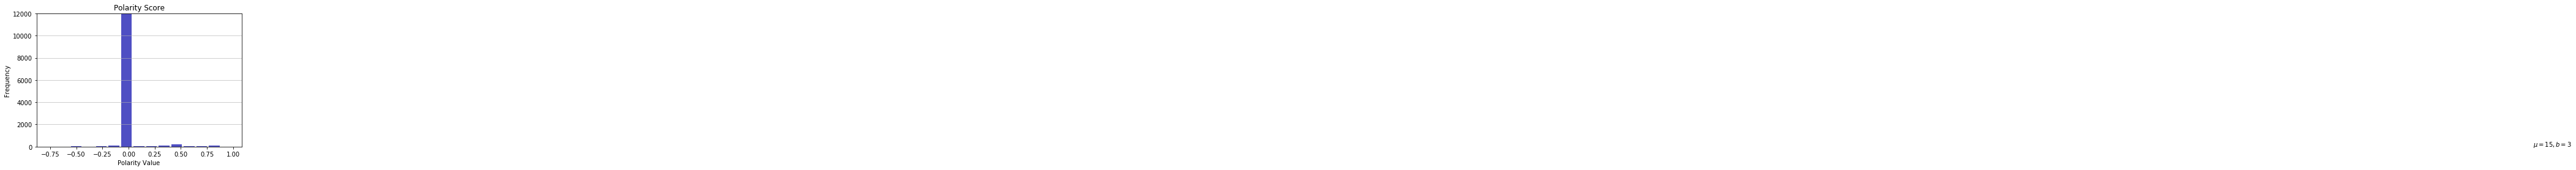

In [132]:
## Generating a Histogram with Polarity Score 
n, bins, patches = plt.hist(x=df2.polarity, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Polarity Value')
plt.ylabel('Frequency')
plt.title('Polarity Score')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [133]:
## Reviewing the polarity score values
df2.polarity.describe()

count    12717.000000
mean         0.014670
std          0.109718
min         -0.800000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: polarity, dtype: float64

In [134]:
# Printing the first five rows with the positive sentiment polarity rating

print('5 random reviews with the most positive sentiment: \n')
cl = df2.loc[df2.polarity == 1, ['Name']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most positive sentiment: 

magnificent 7
four awesome
awesome foursome
delightful
eight magnificent mongrel


In [135]:
# Printing the first five rows with the neutral sentiment polarity rating

print('5 reviews with the most neutral sentiment: \n')
cl = df2.loc[df2.polarity == 0, ['Name']].sample(5).values
for c in cl:
    print(c[0])

5 reviews with the most neutral sentiment: 

jefry
yeochi nabi
lex luthor
miaomiao
oreo


In [136]:
#  # Printing the first five rows with the negative sentiment polarity rating

print('5 randmom reviews with the most negative sentiment: \n')
cl = df2.loc[df2.polarity == -0.50, ['Name']].sample(5).values
for c in cl:
    print(c[0])

5 randmom reviews with the most negative sentiment: 

save me or ill die 36
nameless one
nameless
save me or ill die 15
save me or ill die 50


In [137]:
df3=df2
df3.head(2)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords,polarity
0,86e1089a3,nibble,0,2,6,1,six,1,0.0
1,6296e909a,yet,0,0,11,3,eight,3,0.0


In [138]:
##########################################################################################

In [139]:
## Top 20 words from the CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df2['Name'], 10)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Name' , 'count'])
df4.head(5)

xiao 70
ginger 69
male 68
coco 66
in 60
milo 60
urgent 58
angel 56
oreo 55
brown 55


,Name,count
0,xiao,70
1,ginger,69
2,male,68
3,coco,66
4,in,60


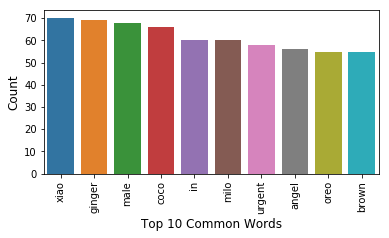

In [140]:
## Bar Graphing the Results
count, ax = plt.subplots(figsize=(6,3))
sns.barplot(x="Name", y="count", data=df4) 
plt.ylabel('Count', fontsize=12)
plt.xlabel('Top 10 Common Words', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [141]:
## Top 20 Bigram words when the stop words have been removed
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df2['Name'], 10)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Name' , 'count'])

save ill 25
ill die 25
shih tzu 20
xiao bai 17
mixed breed 17
long hair 14
xiao hei 13
zone a2 13
golden retriever 11
pet stray 11


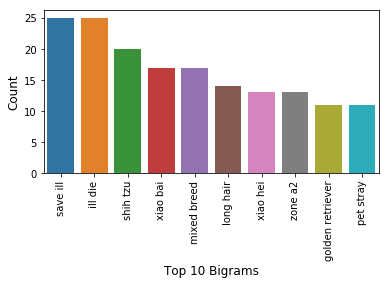

In [142]:
## Bar Graphing the Results for the top 10 bigrams
count, ax = plt.subplots(figsize=(6,3))
sns.barplot(x="Name", y="count", data=df4) 
plt.ylabel('Count', fontsize=12)
plt.xlabel('Top 10 Bigrams', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [143]:
# Top 20 Trigrams when the stop words have been removed

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df2['Name'], 10)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['Name' , 'count'])

save ill die 25
anak kucing terbiar 5
long hair calico 3
american cocker spaniel 3
golden retriever mixed 3
cat need home 2
pet stray blue 2
domestic short hair 2
min pin small 2
pin small breed 2


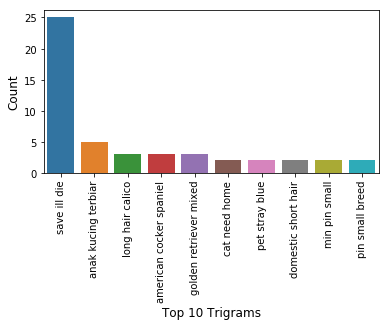

In [144]:
## Bar Graphing the Results
count, ax = plt.subplots(figsize=(6,3))
sns.barplot(x="Name", y="count", data=df5) 
plt.ylabel('Count', fontsize=12)
plt.xlabel('Top 10 Trigrams', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [145]:
#############################################################################################################

In [146]:
## Binning the text length wih zero
df00=df3[df3.text_length_t == 'zero']

df00.text_length_t.unique()

array(['zero'], dtype=object)

In [147]:
## Binning the text length with 3 or less to Zero
df0=df3[df3.text_length_t != 'zero']

df0.text_length_t.unique()

array(['six', 'eight', 'four', 'five', 'seven'], dtype=object)

In [148]:
## Binning the text length that does not contain 3 or 4 text length
df04=df0[df3.text_length_t != 'four']

df04.text_length_t.unique()

array(['six', 'eight', 'five', 'seven'], dtype=object)

In [149]:
## Binning the text length that does not contain 3 or 8 text length
df08=df0[df3.text_length_t != 'eight']

df08.text_length_t.unique()

array(['six', 'four', 'five', 'seven'], dtype=object)

In [150]:
## Binning the text length that does not contain 3, 7 or 8 text length
df078=df08[df3.text_length_t != 'seven']

df078.text_length_t.unique()

array(['six', 'four', 'five'], dtype=object)

In [151]:
## Binning the text length that does not contain 3, 4 or 7 text length
df047=df04[df3.text_length_t != 'seven']

df047.text_length_t.unique()

array(['six', 'eight', 'five'], dtype=object)

In [152]:
## Binning the text length that does not contain 3, 4, 7 or 8text length
df0478=df047[df3.text_length_t != 'eight']

df0478.text_length_t.unique()

array(['six', 'five'], dtype=object)

In [153]:
## Binning the text length it only contains six for text length
df04578=df0478[df3.text_length_t != 'five']

df04578.text_length_t.unique()

array(['six'], dtype=object)

In [154]:
## Binning the text length it only contains five for text length
df04678=df0478[df3.text_length_t != 'six']

df04678.text_length_t.unique()

array(['five'], dtype=object)

In [155]:
## Binning the text length it does not contain three or five  for text length
df05=df0[df3.text_length_t != 'five']

df05.text_length_t.unique()

array(['six', 'eight', 'four', 'seven'], dtype=object)

In [156]:
## Binning the text length it does not contain 8 for text length
df8=df2[df3.text_length_t != 'eight']

df8.text_length_t.unique()

array(['six', 'four', 'five', 'zero', 'seven'], dtype=object)

In [157]:
df8.head(3)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords,polarity
0,86e1089a3,nibble,0,2,6,1,six,1,0.0
2,3422e4906,brisco,0,3,6,1,six,1,0.0
3,5842f1ff5,miko,0,2,4,1,four,1,0.0


In [158]:
## Binning the text length it only contains eight for text length
df88=df2[df3.text_length_t == 'eight']

df88.text_length_t.unique()

array(['eight'], dtype=object)

In [159]:
## Checking the dataframe
df10=df0[df3.text_length_t == 'eight']
df10.head(2)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords,polarity
1,6296e909a,yet,0,0,11,3,eight,3,0.0
7,97aa9eeac,siu pak her 6,0,3,23,6,eight,1,0.0


In [160]:
##################################################################################################

In [161]:
## Filtering all names with more than 3 for text length that contain only 1 word
dfwc1=df0[df0.word_count == 1]

In [162]:
## checking the counts for this dataset
dfwc1.count()

PetID              7160
Name               7160
AdoptionSpeed_t    7160
AdoptionSpeed      7160
text_length        7160
word_count         7160
text_length_t      7160
stopwords          7160
polarity           7160
dtype: int64

In [163]:
## Checking the one word more than three text length database
dfwc1.head()

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords,polarity
0,86e1089a3,nibble,0,2,6,1,six,1,0.0
2,3422e4906,brisco,0,3,6,1,six,1,0.0
3,5842f1ff5,miko,0,2,4,1,four,1,0.0
4,850a43f90,hunter,0,2,6,1,six,0,0.0
6,1caa6fcdb,bulat,0,1,5,1,five,0,0.0


In [164]:
##Creating a word cloud from the Name
text = " ".join(review for review in df2['Name'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 110104 words in the combination of all review.


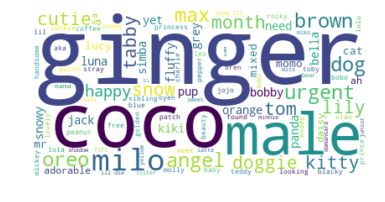

In [165]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=1000, max_words=100, background_color="white").generate(text)

 
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

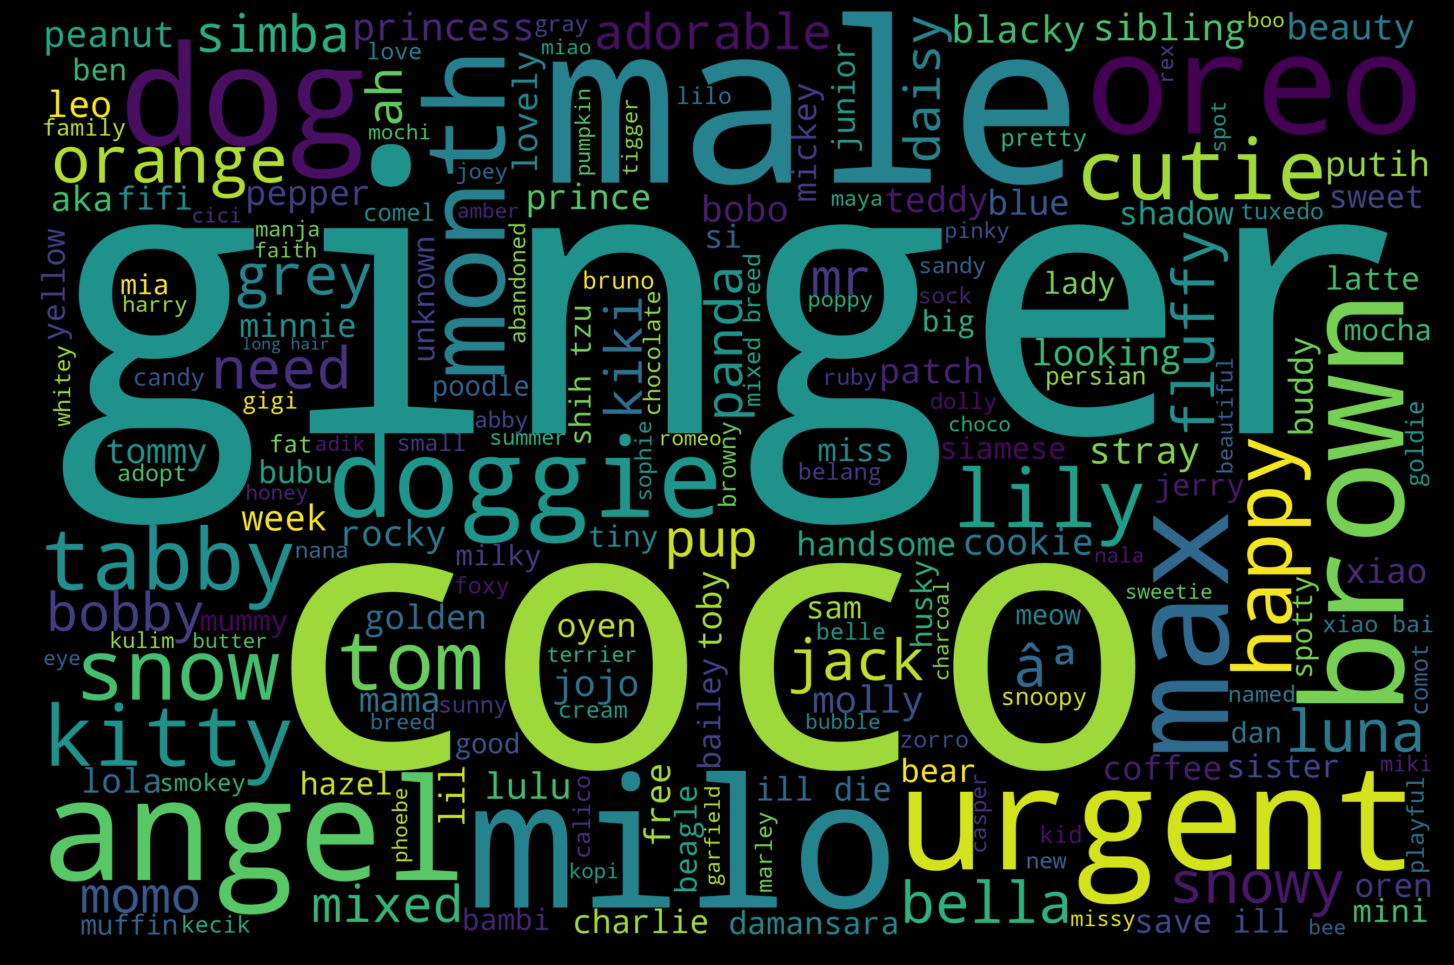

In [166]:
## Generating another wordcloud 
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop).generate(str(text))
fig = plt.figure(
    figsize = (20, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [167]:
##Creating a word cloud from the Name
text1 = " ".join(review for review in df04['Name'])
print ("There are {} words in the combination of all review.".format(len(text1)))

There are 98702 words in the combination of all review.


In [168]:
###########################################################################################

In [169]:
tf1 = (df2['Name']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head(10)

,words,tf
0,nibble,1.0
1,yet,48.0
2,brisco,1.0
3,miko,22.0
4,hunter,9.0
5,bulat,4.0
6,her,28.0
7,siu,1.0
8,pak,2.0
9,6,57.0


In [170]:
## Calcuating the IDF for the Names which was calculated for term frequency
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df2.shape[0]/(len(df2[df2['Name'].str.contains(word)])))

tf1.head()

,words,tf,idf
0,nibble,1.0,9.450695
1,yet,48.0,5.518869
2,brisco,1.0,9.450695
3,miko,22.0,6.154858
4,hunter,9.0,7.253470


In [171]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head(10)

,words,tf,idf,tfidf
0,nibble,1.0,9.450695,9.450695
1,yet,48.0,5.518869,264.905728
2,brisco,1.0,9.450695,9.450695
3,miko,22.0,6.154858,135.406878
4,hunter,9.0,7.253470,65.281233
5,bulat,4.0,7.841257,31.365028
6,her,28.0,4.467088,125.078473
7,siu,1.0,9.450695,9.450695
8,pak,2.0,8.757548,17.515096
9,6,57.0,4.567893,260.369903


In [172]:
## Generating the term frequency mean value
tf1.tfidf.mean()

20.101704873340484

In [173]:
## Generating the term frequency max value
tf1.tfidf.max()

360.2640906771604

In [174]:
## Generating the terf frequency min value
tf1.tfidf.min()

0.7814676127490113

In [175]:
################################################################################################################

## Baseline model values for Naive bayes
X = df2.Name
y = df2.AdoptionSpeed_t

In [176]:
## Testing the name attribute with adoption speed using Naive Bayes
## Setting up the X and y values 

X = df2.Name
y = df2.AdoptionSpeed_t

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [177]:
## Vectorizing the X values 

vect = CountVectorizer(max_features=1000, binary=True, stop_words=stop)

X_train_vect = vect.fit_transform(X_train)

In [178]:
## Checking he vect parameters
vect

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({'', 'became', 'kitten', 'were', 'others', 'which', 'even', 'afterwards', 'thin', 'me', 'after', 'whether', 'in', 'some', 'up', 'forty', 'girl', 'not', 'until', 'hereafter', 'bottom', 'these', 'therein', 'by', 'whoever', 'third', 'anything', 'latterly', 'hundred', 'are', 'with',...ept', 'also', 'call', 'the', 'beyond', 'very', 'you', 'herein', 'thru', 'nothing', 'become', 'put'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [179]:
## Printing the counts for the select datasets
counts = dfwc1.Name.value_counts()
print(counts.head())

# print("\nPredicting only -1 = {:.2f}% accuracy".format(counts[-1] / sum(counts) * 100))

coco     41
oreo     39
angel    35
milo     35
kiki     32
Name: Name, dtype: int64


In [180]:
## imbalance using SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)

In [181]:
## Generating the unique counts from training dataset
unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))

[(0, 6018), (1, 2248)]


In [182]:
## Creaing the NB Model and fitting the model

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)

0.6424891990694583

In [183]:
## Model paramaters 
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [184]:
X_test_vect = vect.transform(X_test)

y_pred3 = nb.predict(X_test_vect)

y_pred3

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [185]:
## Printing the model metrics 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred3) * 100))

print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred3) * 100))

print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred3))

Accuracy: 64.10%

F1 Score: 31.30

COnfusion Matrix:
 [[2489  741]
 [ 857  364]]


In [186]:
#Printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred3)
print(confusion_matrix)

[[2489  741]
 [ 857  364]]


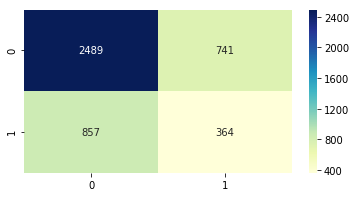

In [187]:
# visualize the confusion matrix with seaborn library
count, ax = plt.subplots(figsize=(6,3))
sns.heatmap(confusion_matrix,annot=True,fmt="d", cmap="YlGnBu") 
plt.show()

In [188]:
## Name counts fr select files 
dfwc1.Name.value_counts()

coco                      41
oreo                      39
angel                     35
milo                      35
kiki                      32
lucy                      31
snowy                     30
bobby                     30
lily                      29
ginger                    29
happy                     27
fluffy                    25
daisy                     25
prince                    25
simba                     25
molly                     24
lola                      24
momo                      24
bella                     23
luna                      23
panda                     23
rocky                     23
jojo                      22
princess                  22
tommy                     21
patch                     21
bobo                      21
snow                      21
buddy                     21
peanut                    20
                          ..
rufio                      1
kate                       1
sheiba                     1
pogo          

In [189]:
## Filtering the dfwc1 for adoptionspeed of 0 only
dfwc1_as0= dfwc1[dfwc1['AdoptionSpeed_t'] ==0]
dfwc1_as0.head(1)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords,polarity
0,86e1089a3,nibble,0,2,6,1,six,1,0.0


In [190]:
## Filtering the dfwc1 for the adoptionspeed of 1 only
dfwc1_as01= dfwc1[dfwc1['AdoptionSpeed_t'] ==1]
dfwc1_as01.head(1)

,PetID,Name,AdoptionSpeed_t,AdoptionSpeed,text_length,word_count,text_length_t,stopwords,polarity
21,234a5a54c,tiger,1,4,6,1,six,0,0.0


In [191]:
## Top 20 words from the CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(dfwc1_as0['Name'], 10)
for word, freq in common_words:
    print(word, freq)
df100 = pd.DataFrame(common_words, columns = ['Name' , 'count'])

milo 32
coco 28
oreo 26
snowy 25
angel 24
fluffy 22
ginger 21
kiki 21
momo 20
bobby 20


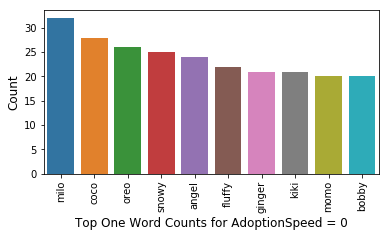

In [192]:
 ## Bar Graphing the Results
count, ax = plt.subplots(figsize=(6,3))
sns.barplot(x="Name", y="count", data=df100) 
plt.ylabel('Count', fontsize=12)
plt.xlabel('Top One Word Counts for AdoptionSpeed = 0', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [193]:
## Top 20 words from the CountVectorizer for AS of 0

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(dfwc1_as01['Name'], 10)
for word, freq in common_words:
    print(word, freq)
df200 = pd.DataFrame(common_words, columns = ['Name' , 'count'])

lucy 15
oreo 13
coco 13
happy 13
lily 11
kiki 11
angel 11
bobby 10
bella 10
buddy 9


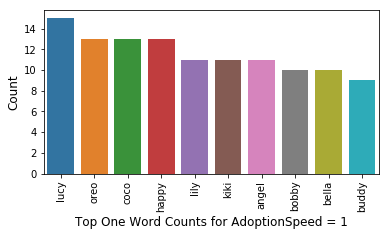

In [194]:
 ## Bar Graphing the Results for top one words for AS of 1
    
count, ax = plt.subplots(figsize=(6,3))
sns.barplot(x="Name", y="count", data=df200) 
plt.ylabel('Count', fontsize=12)
plt.xlabel('Top One Word Counts for AdoptionSpeed = 1', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()